In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import scipy
from scipy import signal
import sys, os

Insert here the name of your file in the list 

In [2]:
files_list = ["PCB6_gain56_gate104_histo.txt","PCB6_gain60_gate104_histo.txt","PCB6_gain62_gate104_histo.txt"]
file = []
for file_name in files_list:
    file.append(np.loadtxt(file_name, skiprows=7))

Plot the data from the file

Text(0, 0.5, 'Number of counts')

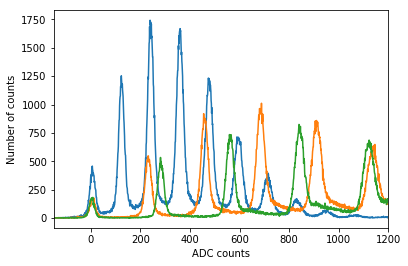

In [3]:
fileNumber = len(files_list)
for i in range(fileNumber):
    plt.plot(file[i][:,0], file[i][:,1])
plt.xlim(-150,1200)
plt.xlabel("ADC counts")
plt.ylabel("Number of counts")

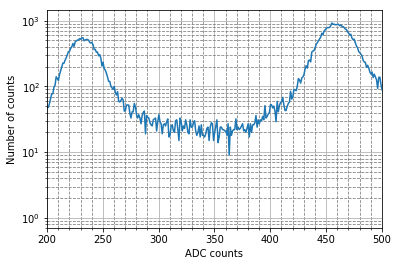

In [6]:
file_to_plot = 1
plt.plot(file[file_to_plot][:,0], file[file_to_plot][:,1])

plt.xlim(200,500)
plt.xlabel("ADC counts")
plt.ylabel("Number of counts")

plt.minorticks_on()
plt.grid(True, which='major',linestyle='-')
plt.grid(True, which='minor', color='grey', linestyle='--')
plt.yscale('log')

Insert the value of the first and second peak to calculate the gain:

In [39]:
p0 =230
p1 =460

gain = p1 - p0
print(gain)

230


Define the threshold for the DCR:

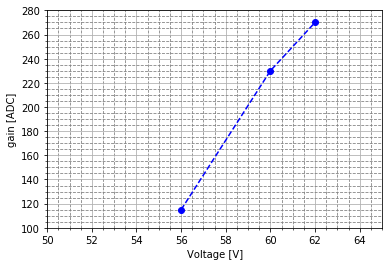

In [42]:
gains=[115,230,270]
voltages = [56,60,62]
plt.plot(voltages, gains, '--bo')

plt.xlim(50,65)
plt.ylim(100,280)
plt.xlabel("Voltage [V]")
plt.ylabel("gain [ADC]")

plt.minorticks_on()
plt.grid(True, which='major',linestyle='-')
plt.grid(True, which='minor', color='grey', linestyle='--')

Let's find the breakdown voltage

Your fit parameters are [   26.25 -1352.5 ]


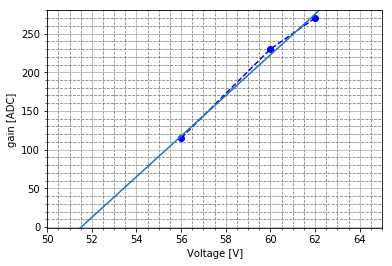

In [79]:
plt.plot(voltages, gains, '--bo')

plt.xlim(50,65)
plt.ylim(-1,280)
plt.xlabel("Voltage [V]")
plt.ylabel("gain [ADC]")

plt.minorticks_on()
plt.grid(True, which='major',linestyle='-')
plt.grid(True, which='minor', color='grey', linestyle='--')

def func(x, m, q):
     #print(x.shape,m.shape,q.shape)    
     return (x * m) + q

xdata=np.array(voltages)
ydata=np.array(gains)

optimizedParameters,cov = scipy.optimize.curve_fit(func,xdata,ydata)

x1=np.arange(50,100,1)
plt.plot(x1, func(x1, *optimizedParameters), label="fit")

print("Your fit parameters are "+str(optimizedParameters))

Let's be more precise:

In [78]:
m = optimizedParameters[0]
q = optimizedParameters[1]

Vbd=-q/m 
print("The breakdown voltage is "+str(Vbd)+" V")


The breakdown voltage is 51.52380952381389 V


Now you can repeat it for another SiPM and compare the results